# Acquisition and Preparation of Zillow Data

### Import libraries and modules

In [1]:
from acquire import get_zillow_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Load dataset

#### First, I explored and then queried the dataset in MySQL.  I had to find out how to pull the requested columns from the different tables within the dataset.  The key was knowing that propertylandusetypeid = 261 for single family homes.

In [2]:
df = get_zillow_data()
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 131.4 MB


In [3]:
# Total entries in raw data:
raw_entries = df.shape[0]
raw_entries

2152863

In [4]:
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

There are a number of null values throughout the dataset.  Let's see how many records removing all nulls has on the dataset, then remove the biggest one, yearbuilt, and see what that does to the overall set.

In [5]:
df.dropna().shape

(2140235, 7)

In [6]:
df = df[df['yearbuilt'].notna()]
df.isnull().sum()

bedroomcnt                         7
bathroomcnt                        7
calculatedfinishedsquarefeet     607
taxvaluedollarcnt                118
yearbuilt                          0
taxamount                       2708
fips                               0
dtype: int64

I will keep working my way down.  The only concern I have here is am losing quality rows where just a small piece of info is missing that could easily be imputed.

In [7]:
df = df[df['taxamount'].notna()]
df.isnull().sum()

bedroomcnt                        2
bathroomcnt                       2
calculatedfinishedsquarefeet    565
taxvaluedollarcnt                21
yearbuilt                         0
taxamount                         0
fips                              0
dtype: int64

In [8]:
df = df[df['calculatedfinishedsquarefeet'].notna()]
df.isnull().sum()

bedroomcnt                       0
bathroomcnt                      0
calculatedfinishedsquarefeet     0
taxvaluedollarcnt               18
yearbuilt                        0
taxamount                        0
fips                             0
dtype: int64

In [9]:
df = df[df['taxvaluedollarcnt'].notna()]
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [10]:
df.shape

(2140235, 7)

#### The dropna on the enture dataset worked exactly like removing nans from each category individually.

What percentage of the entire dataset is null, and can we simply drop them and move on?

In [11]:
print(f' Percent loss if all null columns eliminated = {100*(1-(df.shape[0]/raw_entries)):.2f}%')

 Percent loss if all null columns eliminated = 0.59%


That is such a small number let's just drop all of these columns.

#### Converting floats to integers, where able

I noticed all of the columns, except bathroomcnt, are floats that could be integers (taxamount is also a float but I feel comfortable round that to an integer).  So let's change them to integers since that is easier for the computer to work with.

In [12]:
df = df.astype({'bedroomcnt':'int', 'calculatedfinishedsquarefeet':'int', 'taxvaluedollarcnt':'int', 'yearbuilt':'int', 'taxamount':'int','fips':'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    int64  
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  int64  
 3   taxvaluedollarcnt             int64  
 4   yearbuilt                     int64  
 5   taxamount                     int64  
 6   fips                          int64  
dtypes: float64(1), int64(6)
memory usage: 130.6 MB


#### Examing values for funky numbers

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2140235.0,3.301419,0.932600,0.0,3.0,3.0,4.0,25.0
bathroomcnt,2140235.0,2.240352,0.990549,0.0,2.0,2.0,3.0,32.0
calculatedfinishedsquarefeet,2140235.0,1863.193970,1221.754161,1.0,1258.0,1623.0,2208.0,952576.0
taxvaluedollarcnt,2140235.0,460641.625164,677157.635675,22.0,189166.0,328296.0,534606.0,90188462.0
yearbuilt,2140235.0,1960.967545,22.150563,1801.0,1949.0,1958.0,1976.0,2016.0
taxamount,2140235.0,5616.218147,7814.562814,6.0,2540.0,4111.0,6411.0,1078101.0
fips,2140235.0,6048.309556,20.344910,6037.0,6037.0,6037.0,6059.0,6111.0


In [14]:
df[df['calculatedfinishedsquarefeet'] < 400].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 14 to 2152505
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    2009 non-null   int64  
 1   bathroomcnt                   2009 non-null   float64
 2   calculatedfinishedsquarefeet  2009 non-null   int64  
 3   taxvaluedollarcnt             2009 non-null   int64  
 4   yearbuilt                     2009 non-null   int64  
 5   taxamount                     2009 non-null   int64  
 6   fips                          2009 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 125.6 KB


I am going to eliminate all homes with a square footage under 400 sqft, as it is only 2k rows (< .1% of total) and probably gets rid of some bad data.

In [15]:
df = df[df['calculatedfinishedsquarefeet'] > 400]

Next I look at the taxvaluedollarcnt.  I decided to eliminate all those under $10k.

In [16]:
df[df['taxvaluedollarcnt'] < 10000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 11 to 2138174
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    197 non-null    int64  
 1   bathroomcnt                   197 non-null    float64
 2   calculatedfinishedsquarefeet  197 non-null    int64  
 3   taxvaluedollarcnt             197 non-null    int64  
 4   yearbuilt                     197 non-null    int64  
 5   taxamount                     197 non-null    int64  
 6   fips                          197 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 12.3 KB


In [17]:
df = df[df['taxvaluedollarcnt'] > 10000]

Next I look at taxamount and decided to get a bit more granular on this one, as the outlier data wasn't as obvious.

In [18]:
for i in range(100,2500,100): 
    x = df[df['taxamount'] < i].shape[0]
    print(f'People who pay less than ${i} tax amount = {x}')

People who pay less than $100 tax amount = 228
People who pay less than $200 tax amount = 682
People who pay less than $300 tax amount = 1542
People who pay less than $400 tax amount = 4163
People who pay less than $500 tax amount = 9287
People who pay less than $600 tax amount = 17770
People who pay less than $700 tax amount = 29840
People who pay less than $800 tax amount = 46588
People who pay less than $900 tax amount = 72355
People who pay less than $1000 tax amount = 104381
People who pay less than $1100 tax amount = 139847
People who pay less than $1200 tax amount = 174480
People who pay less than $1300 tax amount = 206047
People who pay less than $1400 tax amount = 234235
People who pay less than $1500 tax amount = 260054
People who pay less than $1600 tax amount = 284524
People who pay less than $1700 tax amount = 308622
People who pay less than $1800 tax amount = 332228
People who pay less than $1900 tax amount = 355657
People who pay less than $2000 tax amount = 379887
Peopl

Based on this I am going to cut all those paying less than $200 as outliers.

Now a quick visual check on the dataset:

In [19]:
df = df[df['taxamount'] > 200]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2137028.0,3.304882,0.927623,0.0,3.0,3.0,4.0,25.0
bathroomcnt,2137028.0,2.242574,0.988722,0.0,2.0,2.0,3.0,32.0
calculatedfinishedsquarefeet,2137028.0,1865.140382,1221.416753,401.0,1259.0,1624.0,2209.0,952576.0
taxvaluedollarcnt,2137028.0,461122.073688,677382.525670,10091.0,189615.0,328816.0,535000.0,90188462.0
yearbuilt,2137028.0,1960.985765,22.143597,1801.0,1949.0,1958.0,1976.0,2016.0
taxamount,2137028.0,5622.631844,7817.031843,201.0,2547.0,4116.0,6416.0,1078101.0
fips,2137028.0,6048.312721,20.341286,6037.0,6037.0,6037.0,6059.0,6111.0


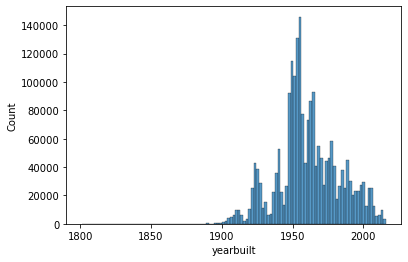

In [20]:
sns.histplot(x='yearbuilt', data = df, bins = 115)
plt.show()

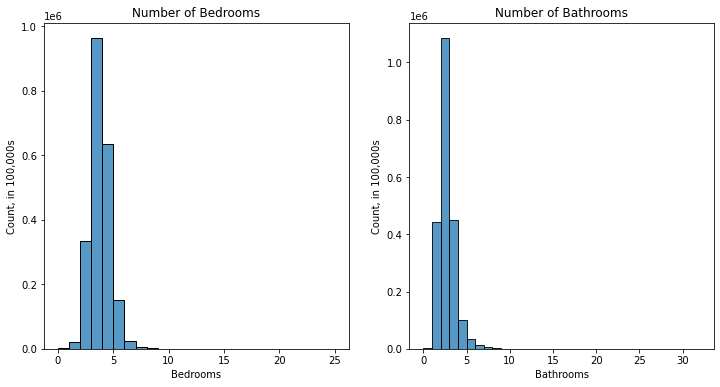

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title('Number of Bedrooms')
plt.ylabel('Count, in 100,000s')
plt.xlabel('Bedrooms')
sns.histplot(x = 'bedroomcnt', data=df, bins=25, stat='count')
plt.subplot(122)
plt.title('Number of Bathrooms')
plt.ylabel('Count, in 100,000s')
plt.xlabel('Bathrooms')
sns.histplot(x = 'bathroomcnt', data=df, bins=32)

plt.show()

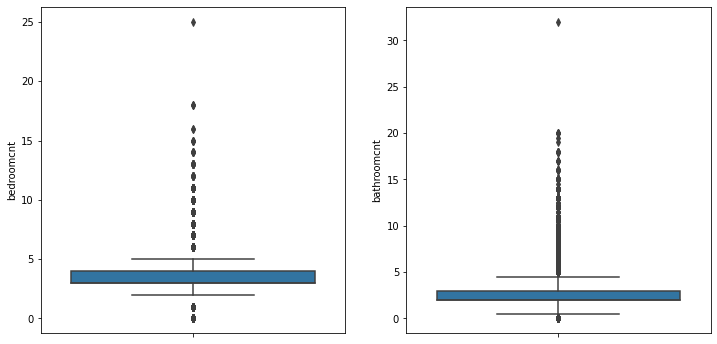

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(y = 'bedroomcnt', data=df)
plt.subplot(122)
sns.boxplot(y = 'bathroomcnt', data=df)

plt.show()

I want to remove some outliers in the bathroom and bedroom counts.  Do zero bedrooms and bathrooms make sense for a 'family' home?  What should be the maximum?

In [23]:
df[df['bathroomcnt'] >= 8].shape[0]

3216

In [24]:
df[df['bathroomcnt'] == 0].shape[0]

2775

In [25]:
df[df['bedroomcnt'] == 0].shape[0]

2788

In [26]:
df[df['bedroomcnt'] >= 8].shape[0]

1589

In [27]:
df = df[df['bathroomcnt'] > 0]
df = df[df['bedroomcnt'] > 0]
df = df[df['bathroomcnt'] < 8]
df = df[df['bedroomcnt'] < 8]

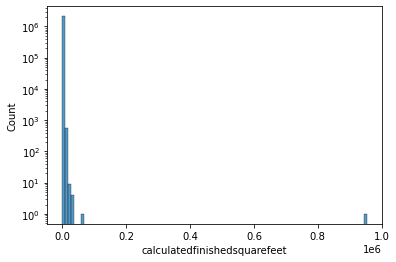

In [28]:
sns.histplot(x='calculatedfinishedsquarefeet', data = df, bins = 100, log_scale=(False, True))
plt.show()

This visualization showed I needed to remove some massive outlier, especailly after looking at the related data from that entry.

In [29]:
df = df[df.calculatedfinishedsquarefeet < 20000]

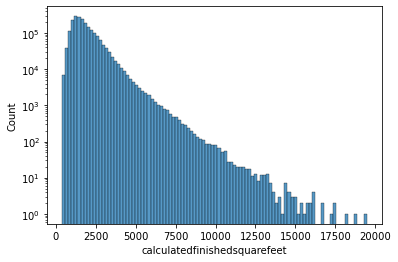

In [30]:
sns.histplot(x='calculatedfinishedsquarefeet', data = df, bins = 100, log_scale=(False, True))
plt.show()

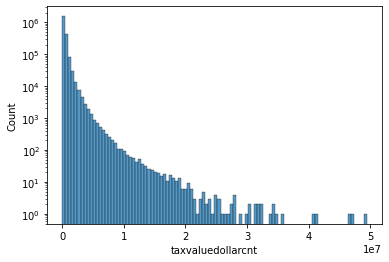

In [31]:
sns.histplot(x='taxvaluedollarcnt', data = df, bins = 100, log_scale=(False,True))
plt.show()

In [32]:
df[df['taxvaluedollarcnt'] > 20000000].shape[0]

73

In [33]:
df = df[df['taxvaluedollarcnt'] < 20000000]

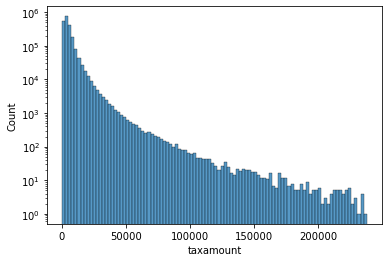

In [34]:
sns.histplot(x='taxamount', data = df, bins = 100, log_scale=(False,True))
plt.show()

In [35]:
df[df['taxamount'] > 300000].shape[0]

0

In [36]:
df = df[df['taxamount'] < 300000]

##### The total amount of the oiginal dataset left to split:

In [37]:
print(f' Percent of dataset remaining after all null columns eliminated = {100*(df.shape[0]/raw_entries):.2f}%')

 Percent of dataset remaining after all null columns eliminated = 98.90%


#### Also, decided to translate the fips codes to the names.  Easier to follow and can encode later.

In [38]:
df['fips_name'] = np.where(df.fips == 6037, 'Los Angeles', np.where(df.fips == 6059, 'Orange','Ventura') )
df = df.drop(columns = 'fips')

### So, in summation, the wrangle for the zillow dataset is:
1. Build SQL query for requested features.
2. Acquire SQL query results using an acquire function and local env credentials.  Save to local csv.
3. Drop all nulls
4. Convert all columns to integers, with the exception of bathrooms (half bathrooms force a float)
5. Go through and drop 'funky' data - clear outliers indicating a high probability of being misentered.
6. Clarify any categorical names (in this case, fips is actually categorical)

## *Test of wrangle*

In [39]:
from wrangle import wrangle_zillow

In [40]:
df = wrangle_zillow()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2129093.0,3.302077,0.904248,1.00,3.00,3.00,4.00,7.00
bathroomcnt,2129093.0,2.234291,0.947438,0.50,2.00,2.00,3.00,7.50
calculatedfinishedsquarefeet,2129093.0,1851.380050,901.500769,401.00,1259.00,1623.00,2204.00,59220.00
taxvaluedollarcnt,2129093.0,450861.737759,553571.566031,10091.00,189545.00,328251.00,533283.00,19899996.00
yearbuilt,2129093.0,1960.967307,22.092824,1801.00,1949.00,1958.00,1975.00,2016.00
taxamount,2129093.0,5504.341108,6356.125887,200.42,2546.41,4111.63,6399.53,237752.21
